# Group proposal

### Introduction 

- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question



Heart disease is a medical condition in which the heart functions poorly in comparison to an average person. This medical condition has a large range of issues such as: coronary blood vessels being blocked or narrowed, angina (discomfort), unstable angina, heart attacks, heart failure, blood pressure problems, valve disease, and Arrhythmia (heart rhythm problems). There are a variety of predictive factors that help doctors diagnose whether someone has or does not have heart disease. The research that our group is conducting uses supervised classification to take in factors: 

    -	Age -years alive
    -	Sex – gender
    -	cp – Chest pain type:  1 - typical angina, 2 - atypical angina, 3 - non-anginal pain, 4 –
    -	asymptomatic
    -	trestbps – resting blood pressure (mm Hg)
    -	chol – cholesterol levels (mg/dl)
    -	thalach – max hearrate (BPM)
    -	exang – exercised induced angina (Binary yes/no)
    -	oldpeak – ST segment depression/concave induced by exercise 
    -	slope – slope of the ST segment: 1 – upsloping, 2 – flat, 3 - down sloping
    -	thal – heart defect: 3 – normal, 6 - fixed defect, 7 - reversable defect
    -	num – truth data (yes/no heart disease)

and we do not consider these factors:

    -	fbs – 1 day no eating blood sugar levels is >120mg/dl (binary yes/no
    -	restcg – resting electrocardiogram results
    -	ca – number of major vessels colored by fluoroscopy (0-3)

to compare to the truth data to make an educated guess to whether someone has or does not have heart disease without knowing the truth data. We will be using Cleveland’s heart disease data to train our model and test it on Hungarian to check for accuracy. 


## Preliminary exploratory data analysis:
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

## Preliminary exploratory data analysis:
### Loading libaray needed:
- to read data via url
- to clean and wrangle data
- to summarize and train data.

In [24]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
options(repr.matrix.max.rows = 6) 
library(dplyr)
library(cowplot)

### Load the data set
- use download.file to read dataset from the web into R

In [25]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "data/cleveland.csv")
heart_disease_data <- read_csv("data/cleveland.csv", col_names = FALSE) 
heart_disease_data             

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


### Clean the date set 
- adding columns name
- change sex from (1,0) to male vs female
- change the Range of num from (0-4) to (0-1).
   - Our main task is to classify to presence or absence of heart disease rather than the 4 levels of heart disease. 
   - Therefore, transform the heart disease level from 0 (0, absence of heart disease) to 1 (1,2,3,4 presence of heart disease)
   
   
Noted that every varible has its own column and each row is a single observation, each value is in the single cell. Therefore the date itself is a tidy data. 

In [26]:
#rename the columns name
heart_disease_data <- read_csv("data/cleveland.csv", col_names = FALSE) |>
                       rename( age = X1,
                               sex = X2,
                               cp = X3,
                               trestbps = X4,
                               chol = X5,
                               fbs = X6,
                               restecg = X7,
                              thalach = X8,
                              exang =  X9, 
                             oldpeak =  X10,
                             slope =  X11, 
                             ca = X12,
                             thal= X13,
                              num = X14)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [27]:
heart_disease_data <- mutate(heart_disease_data, new_num = case_when(num == 0 ~ 0, num == 1| num == 2 | num == 3| num == 4 ~ 1))
heart_disease_data <- mutate(heart_disease_data, sex = case_when(sex == 0 ~ "male",sex == 1 ~ "female"))
heart_disease_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,new_num
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
63,female,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
67,female,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
67,female,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,female,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1
57,male,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1
38,female,3,138,175,0,0,173,0,0.0,1,?,3.0,0,0


### Different level of Factor we are interested in 
- Sex : female & male 

- cp : chest pain type
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
  
- trestbps: blood pressure (in mm Hg)

- chol: serum cholestoral in mg/dl

- fbs: (fasting blood sugar > 120 mg/dl) 
   - 1 = true and 0 = false
   
- exang: exercise induced angina (1 = yes; 0 = no)

-  oldpeak: ST depression induced by exercise relative to rest

- slope: the slope of the peak exercise ST segment
  - Value 1: upsloping
  - Value 2: flat
  - Value 3: downsloping
  
- new_num : diagnosis of heart disease (angiographic disease status)
  - Value 0: < 50% diameter narrowing
  - Value 1: > 50% diameter narrowing 

### Split Data into traning Set and testing set.
Data Set was split into a training set and a testing set where the training Set is 75% of the original dataset and the testing Set is 25% of the original dataset.

In [41]:
set.seed(999) 
hd_split <- initial_split(heart_disease_data, prop = 0.75, strata = new_num)  
hd_train <- training(hd_split)   
hd_test <- testing(hd_split)

## summarize the data

In [42]:
num_of_observation <- nrow(hd_train)
num_of_observation
print("we have 227 observation in our traning Set")
num_of_heart_disease <- hd_train |> 
                        group_by(new_num) |> 
                        summarise(percentage = n()/227)

num_of_heart_disease

num_of_sex <- hd_train |> 
                        group_by(sex) |> 
                        summarise(percentage = n()/227)
num_of_sex

[1] 227

[1] "we have 227 observation in our traning Set"


new_num,percentage
<dbl>,<dbl>
0,0.5418502
1,0.4581498


sex,percentage
<chr>,<dbl>
female,0.660793
male,0.339207


In our training data set, the group of people with absence heart disease and The group of presence have a close amount of total number. 

The female is the majority sex, 67%. 

In [43]:
sumOfData <- hd_train |> 
             select(age,trestbps,chol,thalach) |>
             summary()
sumOfData
print("Table 1 for important numerical varibles")

      age           trestbps          chol          thalach     
 Min.   :29.00   Min.   : 94.0   Min.   :126.0   Min.   : 71.0  
 1st Qu.:48.00   1st Qu.:120.0   1st Qu.:208.0   1st Qu.:132.0  
 Median :56.00   Median :130.0   Median :235.0   Median :152.0  
 Mean   :54.49   Mean   :131.2   Mean   :243.5   Mean   :149.5  
 3rd Qu.:61.00   3rd Qu.:140.0   3rd Qu.:275.5   3rd Qu.:168.0  
 Max.   :77.00   Max.   :192.0   Max.   :417.0   Max.   :202.0  

[1] "Table 1 for important numerical varibles"


**Analysing summary table**

For age, we can see our Range is from 29 years old to 76 years old. Observations are all adults, and the majority are around 50 years old or elder.

For resting blood pressure (trestbps), the normal range for resting blood pressure is *under 120*. From the summary table, we can observe the majority of observations have higher blood pressure than normal health standards. 

For cholesterol level (chol), the mean value gives a 245.1 mg/dl cholesterol level which is considered a high cholesterol level.




### Finding Missing value

In [44]:
is.na(hd_train)
(num_of_missing_columns <- sum(is.na(hd_train)))
## Noted that there is no missing value so there is no rows with missing value



(row_with_question <- hd_train |> 
                    filter(thal == "?" | ca == "?"))
## Noted that there is 3 row with "?" in variable thal, which means they dont have measurement of the thal 
## We should filter out those 3 row in our traning Set 
hd_train <- hd_train |> 
            filter(thal != "?" && ca != "?")

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,new_num
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


[1] 0

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,new_num
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
53,male,3,128,216,0,2,115,0,0.0,1,0.0,?,0,0
58,female,2,125,220,0,0,144,0,0.4,2,?,7.0,0,0
38,female,3,138,175,0,0,173,0,0.0,1,?,3.0,0,0


## Visualizing Data
- show the ditribution of having heart disease among every categorical variable. 
- show the frequency of each numerical varible. 

#### For categorical varible  
- Show the distribution of each categorical variable in the Heart disease Group and No heart disease Group respectively.   

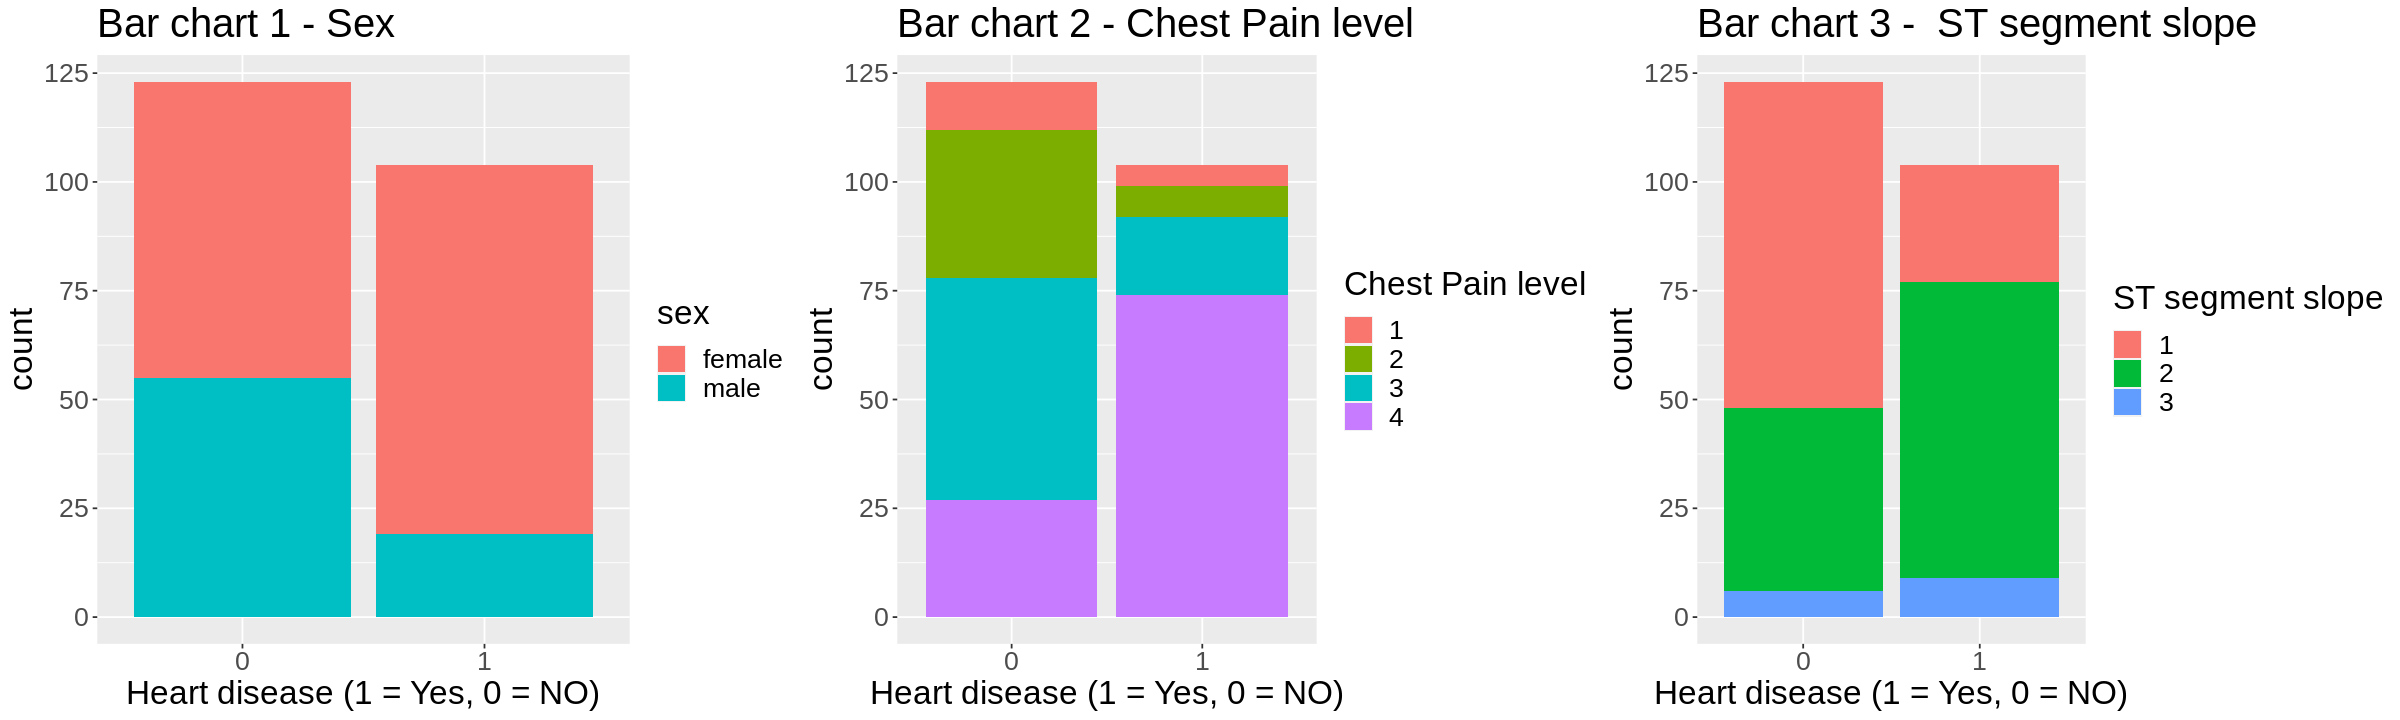

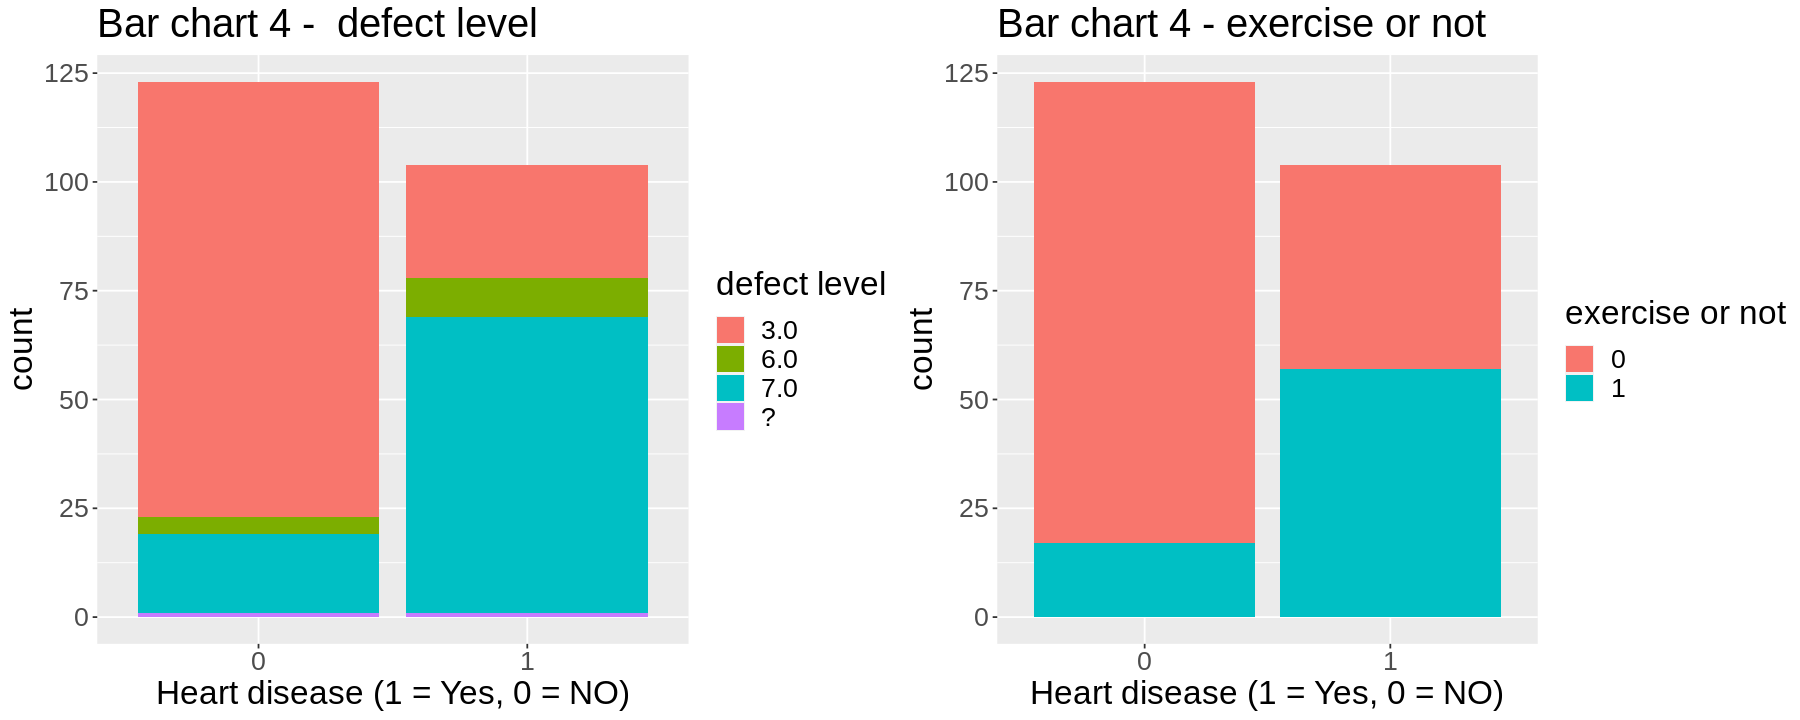

In [36]:
options(repr.plot.width = 20,repr.plot.height =6)
distofnumSex <- hd_train |>
ggplot(aes(x = as_factor(new_num), fill = sex)) +
labs(x = "Heart disease (1 = Yes, 0 = NO)") + 
geom_bar() +
theme(text = element_text(size = 20)) +
ggtitle("Bar chart 1 - Sex")


distofnum_CP <- hd_train |>
ggplot(aes(x = as_factor(new_num), fill = as_factor(cp))) +
labs(x = "Heart disease (1 = Yes, 0 = NO)", fill = "Chest Pain level") + 
geom_bar() +
theme(text = element_text(size = 20)) + 
ggtitle("Bar chart 2 - Chest Pain level")



distofnum_SLOPE <- hd_train |>
ggplot(aes(x = as_factor(new_num), fill = as_factor(slope))) +
labs(x = "Heart disease (1 = Yes, 0 = NO)", fill = "ST segment slope") + 
geom_bar() +
theme(text = element_text(size = 20)) + 
ggtitle("Bar chart 3 -  ST segment slope")
#the slope of the peak exercise ST segment

plot_grid(distofnumSex, distofnum_CP,distofnum_SLOPE,nrow = 1)

########################################################################
options(repr.plot.width = 15,repr.plot.height =6)

distofnum_thal <- hd_train |>
ggplot(aes(x = as_factor(new_num), fill = as_factor(thal))) +
labs(x = "Heart disease (1 = Yes, 0 = NO)", fill = "defect level") + 
geom_bar() +
theme(text = element_text(size = 20)) + 
ggtitle("Bar chart 4 -  defect level")

distofnum_exang <- hd_train |>
ggplot(aes(x = as_factor(new_num), fill = as_factor(exang))) +
labs(x = "Heart disease (1 = Yes, 0 = NO)", fill = "exercise or not") + 
geom_bar() +
theme(text = element_text(size = 20)) + 
ggtitle("Bar chart 4 - exercise or not")

#exercise induced angina (1 = yes; 0 = no)

plot_grid(distofnum_thal,distofnum_exang,nrow = 1)

**Analysing bar chart**

Each bar chart shows its variable has a significantly different distribution among the No heart disease group and having heart disease group, which may lead to an association between variables and heart disease.


#### For numeritcal Varible 
- use histogram shows basic trend of the varible based on our classification varible. 

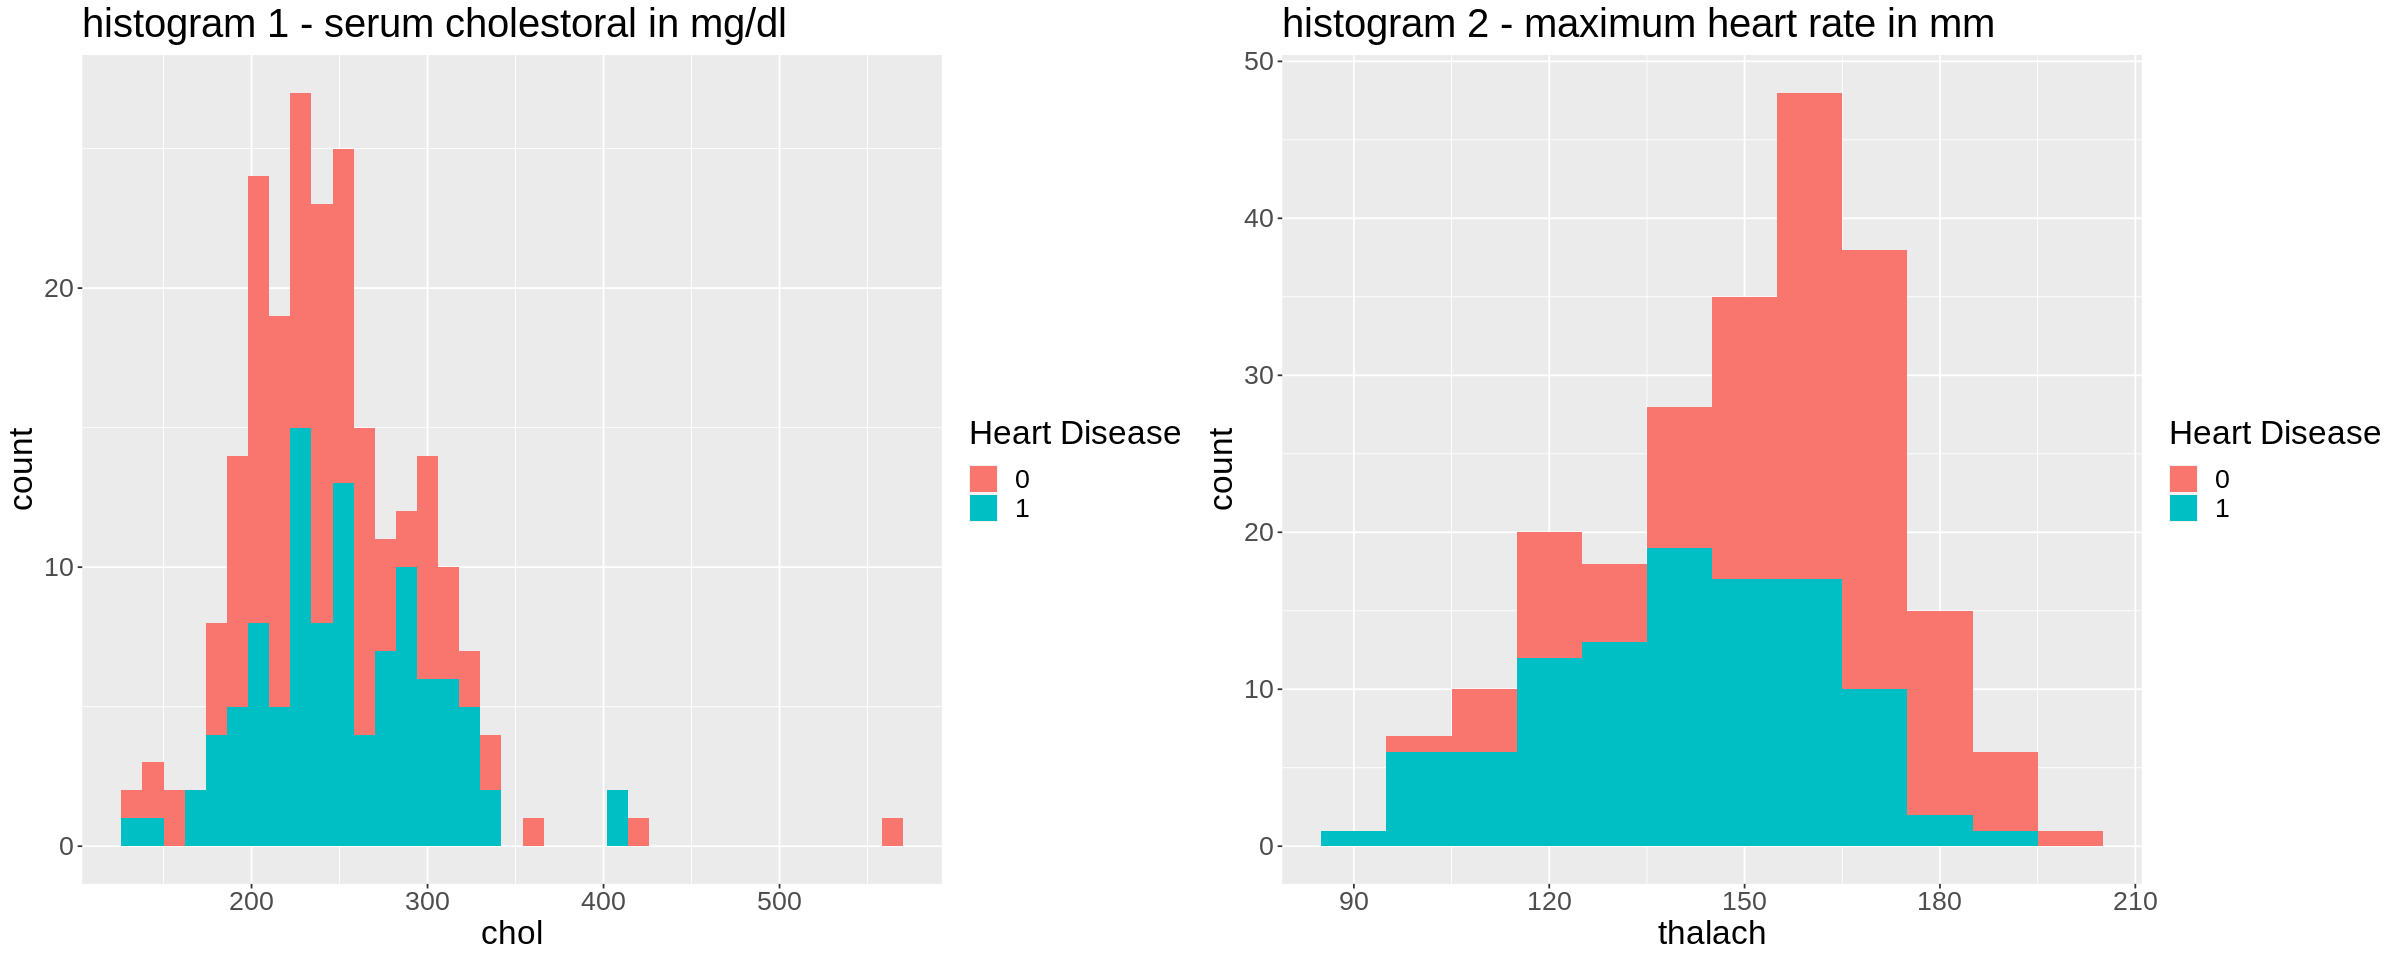

In [37]:

options(repr.plot.width = 20,repr.plot.height =8)

historgram_chol <- hd_train |>
ggplot(aes(x = chol,  fill = as_factor(new_num))) +
geom_histogram(binwidth = 12) +
labs(x = "chol", fill = "Heart Disease") +
theme(text = element_text(size = 20)) + 
ggtitle("histogram 1 - serum cholestoral in mg/dl ")


historgram_thalach <-  hd_train |>
ggplot(aes(x = thalach, fill = as_factor(new_num))) +
geom_histogram(binwidth = 10) +
labs(x = "thalach",fill = "Heart Disease") +
theme(text = element_text(size = 20)) + 
ggtitle("histogram 2 - maximum heart rate in mm")



plot_grid(historgram_chol, historgram_thalach,nrow = 1)

**Analysing histogram**

For histogram 1 - serum cholesterol, there is no obvious trend observed. 

For histogram 2 - in the lower maximum heart rate from 0 to around 120, the heart disease group dominates. There may be an association between a low heart rate and having heart disease. 


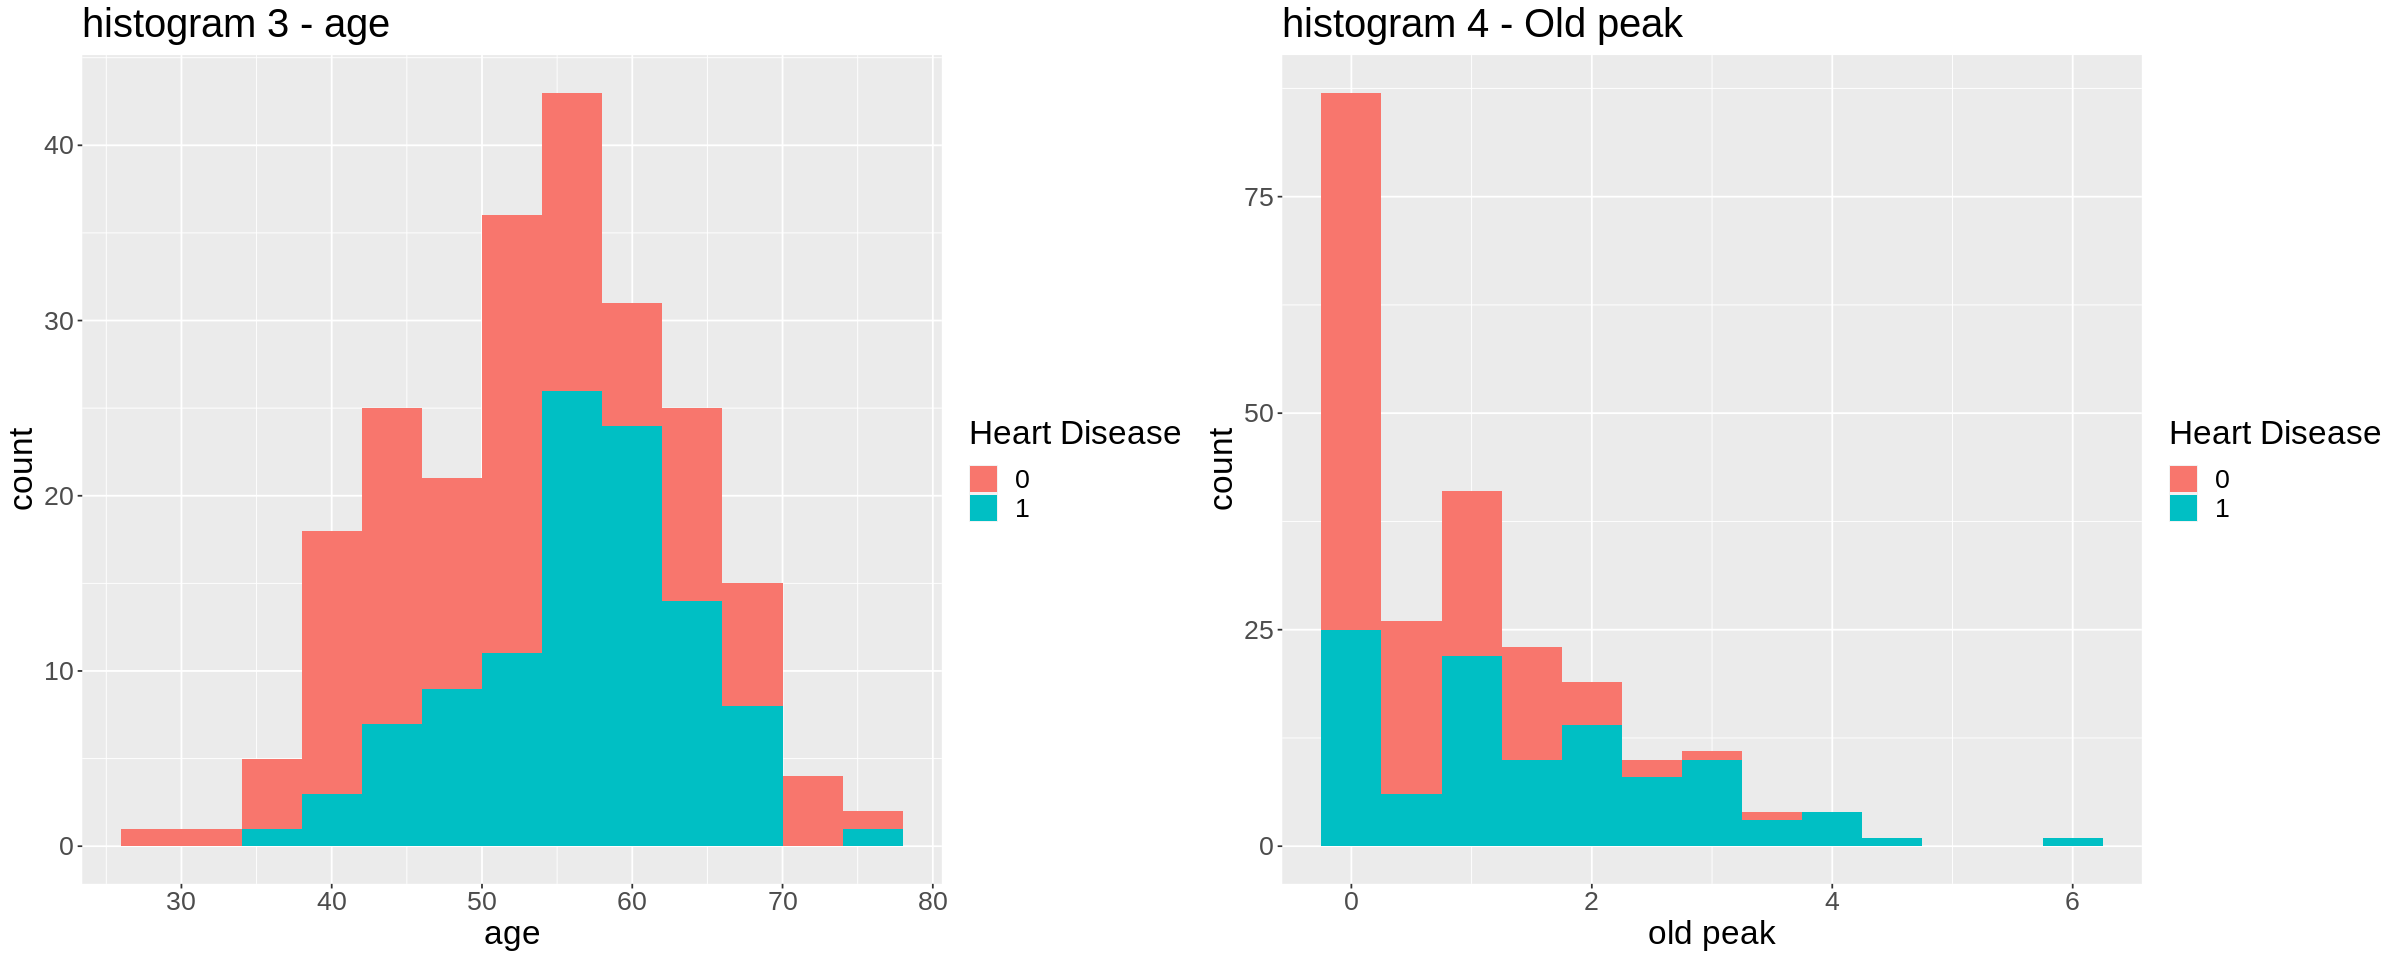

In [38]:

#options(repr.plot.width = 9,repr.plot.height =8)

historgram_age <- hd_train |>
ggplot(aes(x = age,  fill = as_factor(new_num))) +
geom_histogram(binwidth = 4) +
labs(x = "age", fill = "Heart Disease") +
theme(text = element_text(size = 20)) + 
ggtitle("histogram 3 - age ")

historgram_oldpeak <- hd_train |>
ggplot(aes(x = oldpeak,  fill = as_factor(new_num))) +
geom_histogram(binwidth = 0.5) +
labs(x = "old peak", fill = "Heart Disease") +
theme(text = element_text(size = 20)) + 
ggtitle("histogram 4 - Old peak ")

plot_grid(historgram_age, historgram_oldpeak,nrow = 1)

**Analysing histogram**

For histogram 3 - age, there is no obvious trend observed. 

For histogram 4 old peak- as the old peak approach to 2 and higher, the presence of heart disease is increased. 

### Methods:
Based on the bar plots representing each categorical variable and the distribution of heart disease results between them, we can choose the categorical variables to keep which seem to have an effect on heart disease. For this dataset, these would be sex, chest pain level, st segment slope, level of defect, and exercise.

The histograms we used to investigate show that there seems to be a bias towards people who don't have heart disease, so we would look at proportions instead of comparing absolute values. From this, we would be able to investigate which numerical variables would be more impactful on our inference. Judging by the shape of the distributions there is some effect from trestbps (resting blood pressure), chol (cholsterol levels), thalach (max heartrate), and oldpeak (st segment change induced by exercise) on heart disease.

After deciding on all the specific Then, we can use a KNN model, for which we can tune the K value via re-sampling, in order to model our data for specified parameters. With this model, we can use it to predict the expected outcomes from the test dataset.

We can visualize these results by displaying a histogram comparing two variables, then coloring the predicted area and the true area for positive results, which would allow us to see the difference between them. Also, we could compare using scatterplots the points which would be classified incorrectly via the model, and inspect these for any patterns to improve our model.

### Expected outcomes and significance:
- What do you expect to find?

    The main goal of this project is to create a model that can accurately predict the presence or absence of heart disease based on the measurements of the patient. We expect to find the most important predictors of heart disease, as well as their relative importance in predicting the disease. In addition, we hope to determine the optimal model for predicting heart disease, which will offer insights into the underlying patterns in the data.
    
- What impact could such findings have?

    The findings of this study could have a significant impact on the diagnosis and treatment of heart disease. Early detection of heart disease can improve the patients prognosis, and accurate prediction models can help healthcare providers make educated choices. Finding the key risk factors for heart disease can help to better target interventions and preventative measures. Finally, this study could lead to future questions about the underlying mechanisms of heart disease and how to improve the accuracy of prediction models.

- What future questions could this lead to?

    The study's findings could pave the way for future research into the role of genetic factors in heart disease, as well as the impact of lifestyle factors like diet and exercise. Furthermore, additional research could be conducted to determine whether the predictors of heart disease differ between different populations, such as ethnic or age groups. Finally, more work could be done to increase the prediction model's accuracy, such as adding more variables or using more sophisticated machine learning methods.